## Import of libraries needed to run this project

In [347]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns
from sqlite3 import connect
conn = connect(':memory:')


## The following sections of code will pull in data, clean the data, and then execute various operations to prepare the data for visualizations

### Reading in data

In [348]:
# Step to read in weather data and pizza data csv files from the data directory
weather_file = pd.read_csv("data/alexandria_weather_data.csv", low_memory=False)
pizza_file = pd.read_csv("data/alexandria_pizza_data.csv", low_memory=False)

# Reading in a second 'golden' copy that can be used for basic calculations with original numbers
gold_weather_file = pd.read_csv("data/alexandria_weather_data.csv", low_memory=False)

In [349]:
# Sample output of weather file to show successful read of file
weather_file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,42,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,33,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,44,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,41,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,35,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [350]:
# Sample output of pizza date file to show successful read of file
pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType,OrdVoidDate,OrdTaxExemptID,OrdOnlineOrderID,PmtType
0,3/1/2021,Monday,3,19.60,1,NaN,NaN,NaN,3
1,3/1/2021,Monday,2,20.74,3,NaN,NaN,NaN,3
2,3/1/2021,Monday,5,20.97,1,NaN,NaN,NaN,3
3,3/1/2021,Monday,6,9.99,1,NaN,NaN,NaN,3
4,3/1/2021,Monday,10,26.27,1,NaN,NaN,NaN,3


### Cleaning and Prepping Data

In [351]:
# Adding step to round values for early basic calculations
gold_weather_file.temp = gold_weather_file.temp.round(-1) 
gold_weather_file.precip = gold_weather_file.precip.round(2)

# Add step to temp and precip values to allow for better visualization
weather_file.temp = weather_file.temp * 20
weather_file.precip = weather_file.precip * 2000

# Sample readout to confirm the above changes were successful
weather_file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,840,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,660,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,880,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,820,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,700,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [352]:
# Cleaning data ahead of the merge to limit the amount of data in our merged dataframe
pizza_file.drop(['OrdVoidDate', 'OrdTaxExemptID', 'OrdOnlineOrderID', 'PmtType'],axis=1,inplace=True)
weather_file.drop(['name', 'icon', 'stations', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description'],axis=1,inplace=True)

# Sample readout of pizza data file to ensure data looks as expected
pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType
0,3/1/2021,Monday,3,19.60,1
1,3/1/2021,Monday,2,20.74,3
2,3/1/2021,Monday,5,20.97,1
3,3/1/2021,Monday,6,9.99,1
4,3/1/2021,Monday,10,26.27,1
...,...,...,...,...,...
93481,10/31/2023,Tuesday,173,10.49,1
93482,10/31/2023,Tuesday,25,64.69,1
93483,10/31/2023,Tuesday,122,23.98,1
93484,10/31/2023,Tuesday,155,19.98,1


In [353]:
# Sample readout of weather data file to ensure data looks as expected
weather_file.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
0,3/1/2021,55,32,840,55.0,23.9,35.3,28.8,62.0,62.0,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
1,3/2/2021,44,24,660,44.4,16.6,28.6,16.5,52.2,0.0,...,NaN,8.9,49.6,1026.0,0.5,9.9,197.2,17.1,7,NaN
2,3/3/2021,62,27,880,62.1,22.7,42.2,26.6,54.2,0.0,...,19.3,13.6,232.9,1017.5,0.0,9.9,194.3,16.6,7,NaN
3,3/4/2021,52,30,820,51.9,23.2,36.7,25.9,57.3,0.0,...,25.7,16.4,358.6,1021.9,1.3,9.9,197.0,16.9,7,NaN
4,3/5/2021,47,25,700,42.2,18.4,31.0,18.9,54.5,0.0,...,20.8,11.3,357.0,1026.0,7.7,9.9,201.1,17.2,7,NaN


In [354]:
# Sample readout of gold weather data file to ensure data looks as expected
gold_weather_file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,40,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,30,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,40,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,40,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,40,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [355]:
# Adjusting date columns from CSV's to be in format compatible with matplotlib
pizza_file['BusDate'] = pd.to_datetime(pizza_file['BusDate'])
weather_file['datetime'] = pd.to_datetime(weather_file['datetime'])
gold_weather_file['datetime'] = pd.to_datetime(weather_file['datetime'])

# Sample readout of data to ensure changes were successful
pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType
0,2021-03-01,Monday,3,19.60,1
1,2021-03-01,Monday,2,20.74,3
2,2021-03-01,Monday,5,20.97,1
3,2021-03-01,Monday,6,9.99,1
4,2021-03-01,Monday,10,26.27,1
...,...,...,...,...,...
93481,2023-10-31,Tuesday,173,10.49,1
93482,2023-10-31,Tuesday,25,64.69,1
93483,2023-10-31,Tuesday,122,23.98,1
93484,2023-10-31,Tuesday,155,19.98,1


### Merging Data

In [356]:
# Creating 2 combined datasets for use throughout the project. First one is 'gold', which will contain original data only
# Second dataset has adjusted values for 'temp' and 'precip' to show correlation with sales data.
gold_combined_dataset = pizza_file.merge(gold_weather_file, how='left', left_on="BusDate", right_on='datetime', suffixes=('_x', '_y'))
combined_dataset = pizza_file.merge(weather_file, how='left', left_on="BusDate", right_on='datetime', suffixes=('_x', '_y'))

# Adding the daily sum total to the dataframe to allow for simpler visualization
combined_dataset['DailySum'] = combined_dataset.groupby('BusDate')['OtotSubTotal'].transform('sum')

#Reading dataframe into SQL for use with slicing data for visualization
combined_dataset.to_sql(name='combined_db', con=conn)
pizza_file.to_sql(name='pizza_db', con=conn)
weather_file.to_sql(name='weather_db', con=conn)

# Sample readout of 1 dataset to ensure results are as expected. 
combined_dataset.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType,datetime,tempmax,tempmin,temp,feelslikemax,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,DailySum
0,2021-03-01,Monday,3,19.60,1,2021-03-01,55,32,840,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,1416.76
1,2021-03-01,Monday,2,20.74,3,2021-03-01,55,32,840,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,1416.76
2,2021-03-01,Monday,5,20.97,1,2021-03-01,55,32,840,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,1416.76
3,2021-03-01,Monday,6,9.99,1,2021-03-01,55,32,840,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,1416.76
4,2021-03-01,Monday,10,26.27,1,2021-03-01,55,32,840,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,1416.76


## Data Sampling and Simple Visualizations

In [357]:
# This cell will be used to try to sample the data and show various counts
orders_per_day = combined_dataset.DayofWeek.value_counts()
orders_per_day

DayofWeek
Friday       20113
Saturday     18462
Sunday       13451
Thursday     11603
Wednesday    10712
Tuesday       9945
Monday        9200
Name: count, dtype: int64

<Axes: title={'center': 'Number of Orders per Day of Week'}, xlabel='Day of Week', ylabel='Orders'>

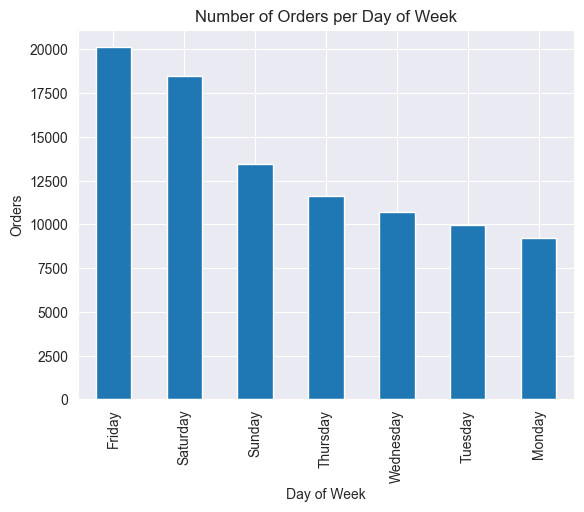

In [495]:
# Simple visualization to show the number of orders per day of the week 
orders_per_day.plot(kind="bar", xlabel='Day of Week', ylabel='Orders', title='Number of Orders per Day of Week')

### *Visualization Summary:*

*While this chart was not surprising, it was an early indication that weekend pizza consumption was strong enough to skew just about any correlation results. You will see as the project continues that the skewed data led me to break most of the future analysis down to either weekday/weekend or per individual day.* 

In [359]:
# Determining the distribution of pizza orders per average daily temperature, rounded to the nearest 10 degrees
# Note: this is using the gold dataset, so it can show actual temperature values
orders_per_avgtemp = gold_combined_dataset.temp.value_counts()
orders_per_avgtemp

temp
70    23761
60    17951
80    14784
50    14123
40    14014
30     6726
20     1927
10      124
0        76
Name: count, dtype: int64

<Axes: title={'center': 'Number of Orders per Temperature'}, xlabel='Temperature', ylabel='Orders'>

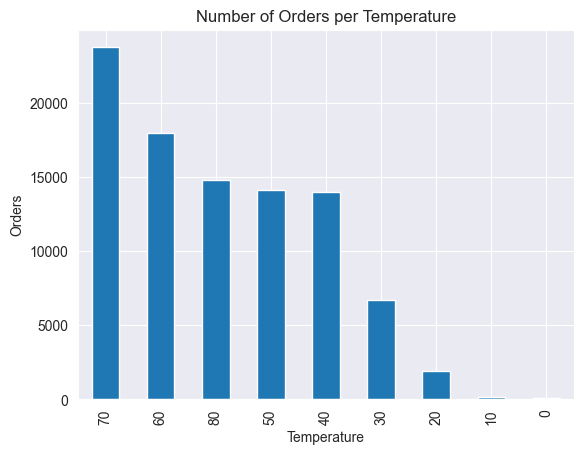

In [494]:
# Visualization of the above command to show number of orders per outside average temperature, rounded to the nearest 10 degrees
orders_per_avgtemp.plot(kind="bar", xlabel='Temperature', ylabel='Orders', title='Number of Orders per Temperature')

### *Visualization Summary:*

*This visualization was a little surpirsing to me. I anticipated there to be an inverse correlation to temperature - meaning that we may see more pizza orders as the temperature declines. The data here seems to suggest that customers prefer to order pizza when the weather is quite comfortable outside.*

In [361]:
# Determining the distribution of pizza orders per amount of daily precipitation (rounded to the nearest 1/100th of an inch) 
# to see if there is a correlation 
# Note: this is using the gold dataset, so it can show actual precipitation values
orders_per_precip = gold_combined_dataset.precip.value_counts()

# I was surprised by what I saw in the sampling below, so the data was written to a CSV for further analysis.
orders_per_precip.to_csv("data/OrdersPrecip.csv")
orders_per_precip

# It seems there is almost no correlation between the amount of precipitation in a day and how many customers order pizza - at least
# not in how I sliced the data.

precip
0.00    57199
0.01     5123
0.02     2846
0.04     1675
0.07     1390
        ...  
0.73       62
0.29       62
1.37       58
0.54       53
0.84       50
Name: count, Length: 87, dtype: int64

## Building dataframes and creating more complex visualizations

In [434]:
# Creating dataframes for daily pizza sales analysis compared to weather data

# Limiting the columns used to only those required for visualization 
limited_dataset = combined_dataset[["BusDate", "DayofWeek", "temp"]]

# Dataframes created for each day of the week
monday_select = (limited_dataset.DayofWeek == "Monday")
monday_orders = limited_dataset[monday_select]
tuesday_select = (limited_dataset.DayofWeek == "Tuesday")
tuesday_orders = limited_dataset[tuesday_select]
wednesday_select = (limited_dataset.DayofWeek == "Wednesday")
wednesday_orders = limited_dataset[wednesday_select]
thursday_select = (limited_dataset.DayofWeek == "Thursday")
thursday_orders = limited_dataset[thursday_select]
friday_select = (limited_dataset.DayofWeek == "Friday")
friday_orders = limited_dataset[friday_select]
saturday_select = (limited_dataset.DayofWeek == "Saturday")
saturday_orders = limited_dataset[saturday_select]
sunday_select = (limited_dataset.DayofWeek == "Sunday")
sunday_orders = limited_dataset[sunday_select]

# Additional dataframes with data combinations in case they are needed 
weekend_orders = pd.concat([friday_orders, saturday_orders, sunday_orders])
montues_orders = pd.concat([monday_orders, tuesday_orders])
weekday_orders = pd.concat([monday_orders, tuesday_orders, wednesday_orders, thursday_orders])

# Sample output to ensure data looks as expected
friday_orders

,BusDate,DayofWeek,temp
267,2021-03-05,Friday,700
268,2021-03-05,Friday,700
269,2021-03-05,Friday,700
270,2021-03-05,Friday,700
271,2021-03-05,Friday,700
...,...,...,...
92990,2023-10-27,Friday,1340
92991,2023-10-27,Friday,1340
92992,2023-10-27,Friday,1340
92993,2023-10-27,Friday,1340


<Axes: title={'center': 'Revenue/Temp/Precip Daily Trend (Full Data)'}, xlabel='Day in Sample'>

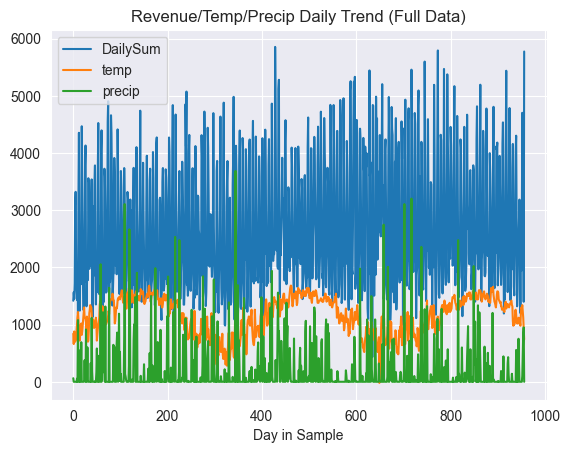

In [500]:
# Building the dataframe to show overall correlation of pizza sales with temperature and precipitation. The values for 
# temperature and precipitation have been modified to allow them to show up on the graph for trend analysis.  
daily_sales_df = pd.read_sql('select distinct BusDate, DailySum, temp, precip from combined_db', conn)
daily_sales_df.plot(xlabel='Day in Sample', title="Revenue/Temp/Precip Daily Trend (Full Data)")

### *Visualization Summary:*

*This graph further showed that there is little to no correlation between pizza sales and the amount of precipitation in a day. With that in mind, precipitation was removed from the remaining visualizations.*

*This graph also showed early signs of correlation between pizza sales and temperature since the general rising and falling of the temperature loosely matched the general rise and fall of sales. The visualizations below dive into that correlation farther.* 

<Axes: title={'center': 'Revenue Average and Distribution by Day of Week'}, xlabel='Day of Week', ylabel='Revenue'>

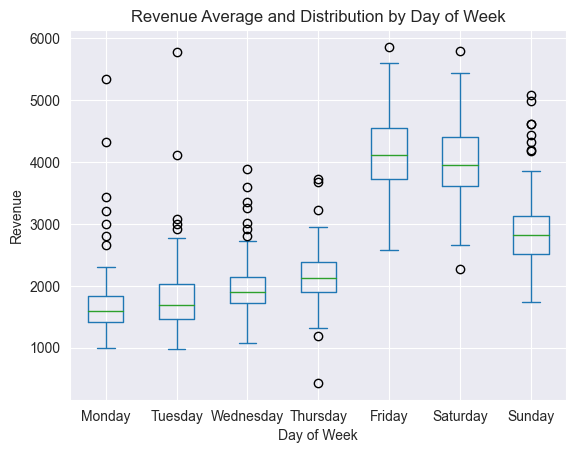

In [496]:
# Creating dataframes for analysis of daily pizza sales per day - sales data only
mon_df = pd.read_sql("select distinct BusDate, DailySum as 'Monday' from combined_db where DayofWeek = 'Monday'", conn)
mon_df = mon_df.drop('BusDate', axis=1)
tue_df = pd.read_sql("select distinct BusDate, DailySum as 'Tuesday' from combined_db where DayofWeek = 'Tuesday'", conn)
tue_df = tue_df.drop('BusDate', axis=1)
wed_df = pd.read_sql("select distinct BusDate, DailySum as 'Wednesday' from combined_db where DayofWeek = 'Wednesday'", conn)
wed_df = wed_df.drop('BusDate', axis=1)
thu_df = pd.read_sql("select distinct BusDate, DailySum as 'Thursday' from combined_db where DayofWeek = 'Thursday'", conn)
thu_df = thu_df.drop('BusDate', axis=1)
fri_df = pd.read_sql("select distinct BusDate, DailySum as 'Friday' from combined_db where DayofWeek = 'Friday'", conn)
fri_df = fri_df.drop('BusDate', axis=1)
sat_df = pd.read_sql("select distinct BusDate, DailySum as 'Saturday' from combined_db where DayofWeek = 'Saturday'", conn)
sat_df = sat_df.drop('BusDate', axis=1)
sun_df = pd.read_sql("select distinct BusDate, DailySum as 'Sunday' from combined_db where DayofWeek = 'Sunday'", conn)
sun_df = sun_df.drop('BusDate', axis=1)

# Combining dataframes to use for visualizations below
week_df = pd.concat([mon_df, tue_df, wed_df, thu_df, fri_df, sat_df, sun_df], axis=1)
weekday_df = pd.concat([mon_df, tue_df, wed_df, thu_df], axis=1)
weekend_df = pd.concat([fri_df, sat_df, sun_df], axis=1)

# Visualization command 
week_df.plot(kind='box', xlabel='Day of Week', ylabel='Revenue', title='Revenue Average and Distribution by Day of Week')

### *Visualization Summary:*

*The chart above was an interesting way to show the average revenue distribution for each day of the week, showing the range of values for each day, and the outliers where they exist.*

<Axes: title={'center': 'Daily Revenue Trend (Weekend)'}, xlabel='Day in Sample', ylabel='Revenue'>

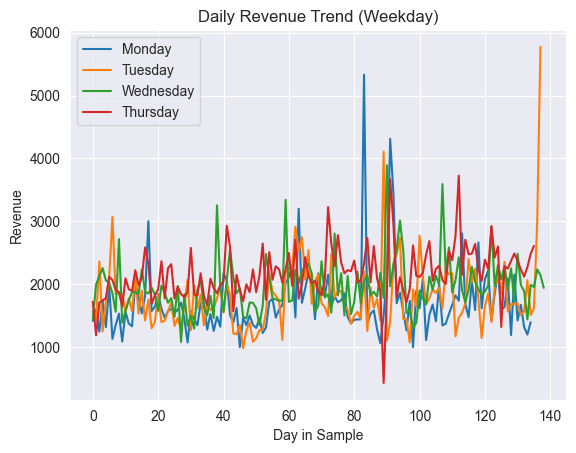

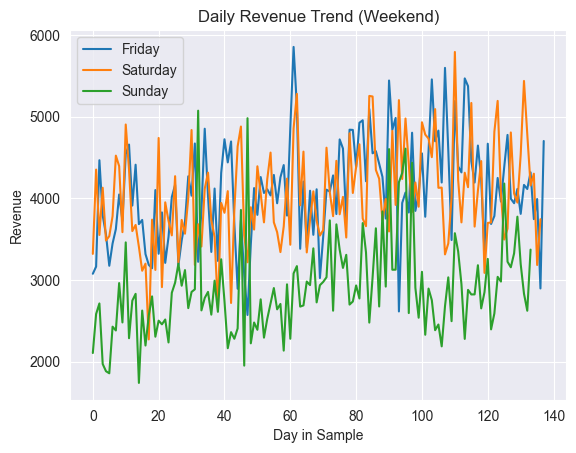

In [497]:
# Visualizations to show revenue per day over time - this was split into weekday and weekend for easier readability of the graph
weekday_df.plot(kind="line", xlabel='Day in Sample', ylabel='Revenue', title='Daily Revenue Trend (Weekday)')
weekend_df.plot(kind="line", xlabel='Day in Sample', ylabel='Revenue', title='Daily Revenue Trend (Weekend)')

### *Visualization Summary:*

*The 2 graphs above were a split of weekday/weekend sales data over time. It is interesting to see the sales rise and fall compared to other days of the week.* 

*One takeaway from the data - the highest Monday (blue) and Tuesday (orange) spikes in the top graph are from Halloween - one of the most popular days of the year for pizza restaurants. The 3rd Halloween spike is in the lower chart since Halloween in 2021 was on a Sunday (green).*

<Axes: title={'center': 'Revenue & Temperature Daily Trend (Sunday)'}, xlabel='Day in Sample'>

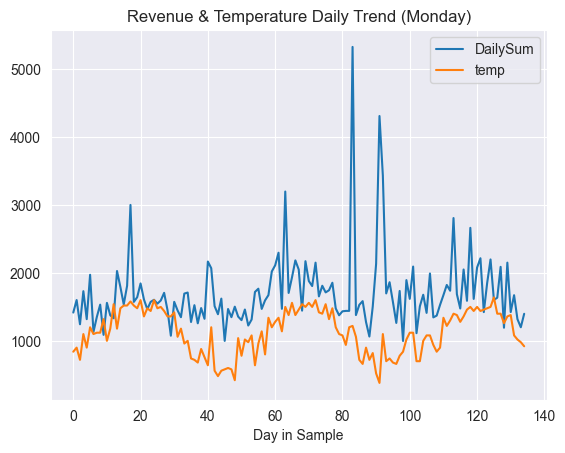

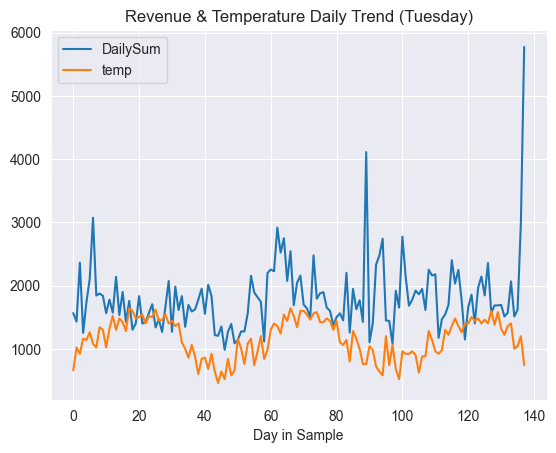

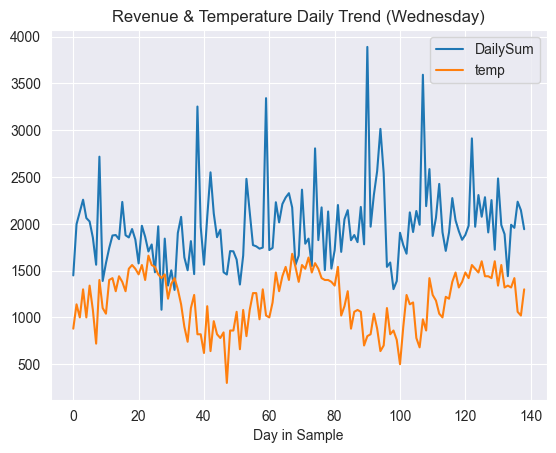

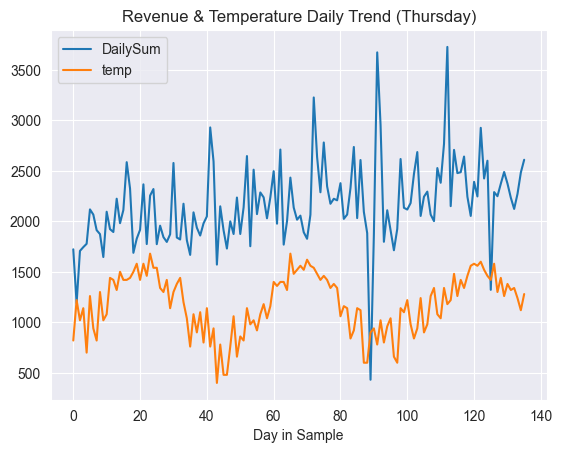

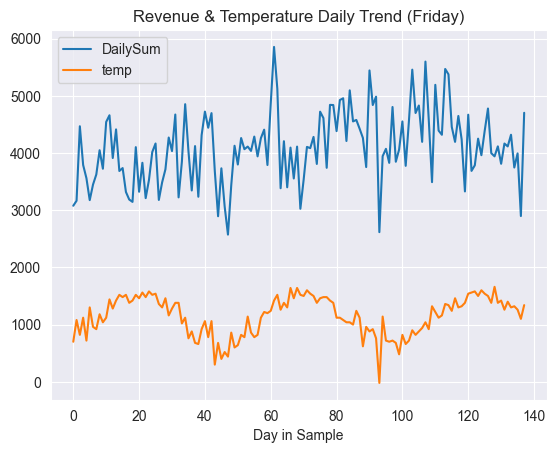

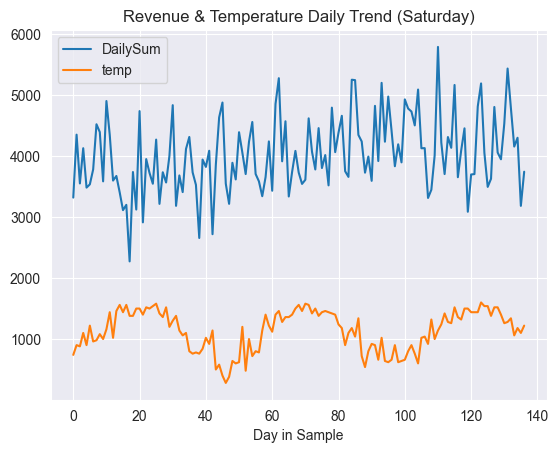

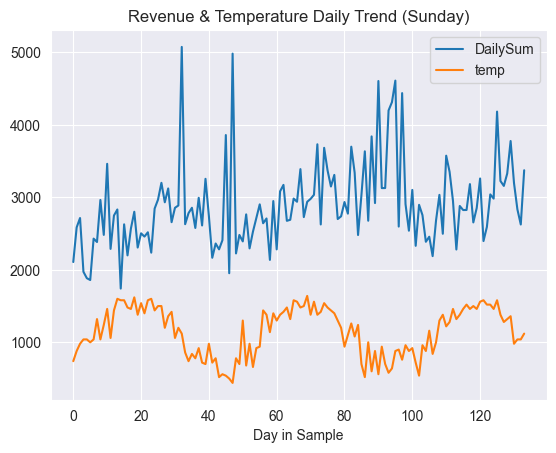

In [501]:
# Building dataframes to detect any correlation with daily sales data and temperature. The values for 
# temperature and precipitation have been modified to allow them to show up on the graph for trend analysis.
monday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Monday'", conn)
tuesday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Tuesday'", conn)
wednesday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Wednesday'", conn)
thursday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Thursday'", conn)
friday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Friday'", conn)
saturday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Saturday'", conn)
sunday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Sunday'", conn)

# Visualization to detect any correlation with daily sales data and temperature
monday_sales_df.plot(xlabel='Day in Sample', title="Revenue & Temperature Daily Trend (Monday)")
tuesday_sales_df.plot(xlabel='Day in Sample', title="Revenue & Temperature Daily Trend (Tuesday)")
wednesday_sales_df.plot(xlabel='Day in Sample', title="Revenue & Temperature Daily Trend (Wednesday)")
thursday_sales_df.plot(xlabel='Day in Sample', title="Revenue & Temperature Daily Trend (Thursday)")
friday_sales_df.plot(xlabel='Day in Sample', title="Revenue & Temperature Daily Trend (Friday)")
saturday_sales_df.plot(xlabel='Day in Sample', title="Revenue & Temperature Daily Trend (Saturday)")
sunday_sales_df.plot(xlabel='Day in Sample', title="Revenue & Temperature Daily Trend (Sunday)")

### *Visualization Summary:*

*The breakdown of sales numbers per day of the week above continues to show a slight correlation between temperature rises and a rise in sales with the strongest correlations appearing to be on Monday and Thursday. As expected the graphs for Friday and Saturday appear to be relatively uneffected by any changes in the temperature.*

<Axes: title={'center': 'Daily Orders per Temperature'}, xlabel='Temperature', ylabel='Number of Orders'>

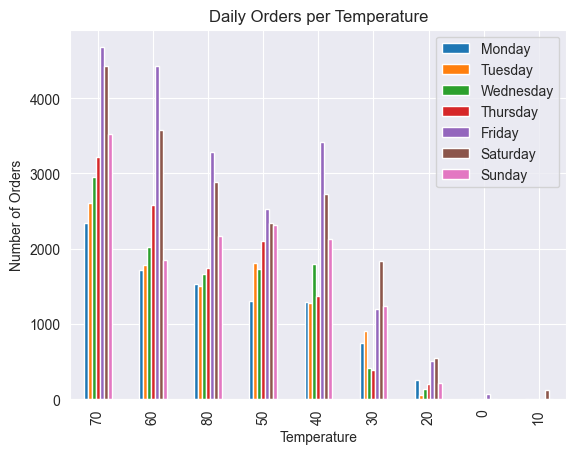

In [503]:
# Steps to create dataframes for daily pizza sales per temperature, rounded to the nearest 10 degrees

# Limiting the columns used to only those required for visualization 
gold_lim_data = gold_combined_dataset[["BusDate", "DayofWeek", "temp"]]

# Dataframes created for each day of the week
fri_sel = (gold_lim_data.DayofWeek == "Friday")
fri_gold = gold_lim_data[fri_sel]
sat_sel = (gold_lim_data.DayofWeek == "Saturday")
sat_gold = gold_lim_data[sat_sel]
sun_sel = (gold_lim_data.DayofWeek == "Sunday")
sun_gold = gold_lim_data[sun_sel]
mon_sel = (gold_lim_data.DayofWeek == "Monday")
mon_gold = gold_lim_data[mon_sel]
tue_sel = (gold_lim_data.DayofWeek == "Tuesday")
tue_gold = gold_lim_data[tue_sel]
wed_sel = (gold_lim_data.DayofWeek == "Wednesday")
wed_gold = gold_lim_data[wed_sel]
thu_sel = (gold_lim_data.DayofWeek == "Thursday")
thu_gold = gold_lim_data[thu_sel]

#Grouping data to show most popular temperature by day
mon_gold_avgtemp = mon_gold.temp.value_counts()
tue_gold_avgtemp = tue_gold.temp.value_counts()
wed_gold_avgtemp = wed_gold.temp.value_counts()
thu_gold_avgtemp = thu_gold.temp.value_counts()
fri_gold_avgtemp = fri_gold.temp.value_counts()
sat_gold_avgtemp = sat_gold.temp.value_counts()
sun_gold_avgtemp = sun_gold.temp.value_counts()

# Building datafram to populate stacked bar chart to display orders per day at each temperature
overall_gold_avgtemp = pd.concat([mon_gold_avgtemp, tue_gold_avgtemp, wed_gold_avgtemp, thu_gold_avgtemp, fri_gold_avgtemp, sat_gold_avgtemp, sun_gold_avgtemp], axis=1)

# Renaming columns for proper labeling in the chart
overall_gold_avgtemp.columns = ["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Command to build visualization
overall_gold_avgtemp.plot(kind='bar', xlabel='Temperature', ylabel='Number of Orders', title="Daily Orders per Temperature")

### *Visualization Summary:*

*The graph above was intended to tease out any anomalies with the data - in other words, are mild temperatures the most popular regardless of the day of the week, or was the weekend data skewing the early results from above. As you can see 70, 60, and 80 degrees appears to be the most popular temperatures for every day of the week.*

*Full disclosure - this is not what I was expecting, but it was quite interesting to learn while examining the data.*